### Perform Sentiment Analysis on the review_text to classify each review as positive, neutral, or negative.
Use a tool like VADER from the nltk library or TextBlob.
Calculate Sentiment Scores for each review.
Classify Sentiments based on compound scores:
Positive: Compound score > 0.05
Neutral: Compound score between -0.05 and 0.05
Negative: Compound score < -0.05

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\niyim\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


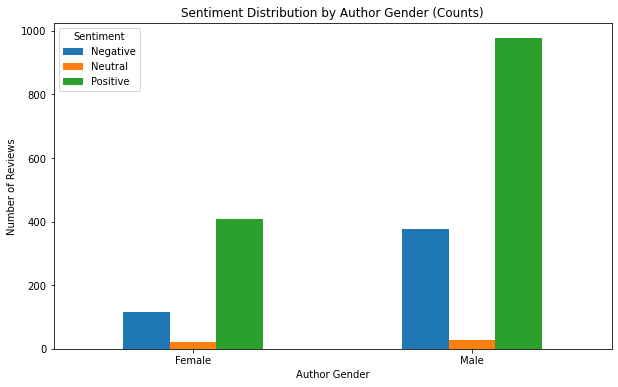

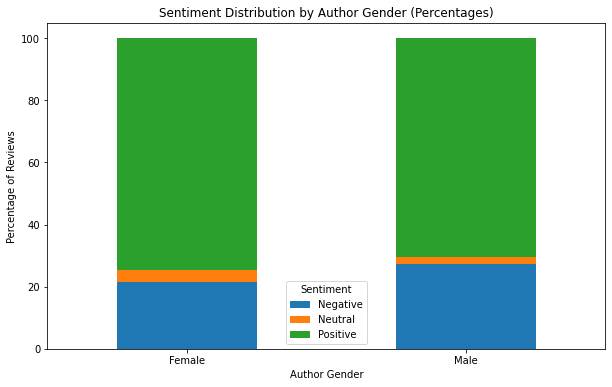

In [3]:
# Re-import necessary libraries after environment reset
import nltk
nltk.download('vader_lexicon')
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Reload the dataset
file_path = r'C:\Users\niyim\Downloads\Normalized_Book_Reviews_Dataset_Author_Genderized.csv'
data = pd.read_csv(file_path)

# Initialize the VADER Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Perform Sentiment Analysis
data['sentiment_score'] = data['normalized_review_text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Classify sentiments
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['sentiment_score'].apply(classify_sentiment)

# Group sentiments by author gender
sentiment_counts = data.groupby(['author_gender', 'sentiment']).size().unstack(fill_value=0)

# Convert counts to percentages
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Plot the bar chart for counts
sentiment_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution by Author Gender (Counts)')
plt.xlabel('Author Gender')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()

# Plot the bar chart for percentages
sentiment_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Author Gender (Percentages)')
plt.xlabel('Author Gender')
plt.ylabel('Percentage of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()


### Statistical Test Results

In [4]:
from scipy.stats import chi2_contingency

# Prepare a contingency table for positive and negative reviews by author gender
frequency_table = sentiment_counts[['Positive', 'Negative']]

# Perform a chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(frequency_table)

# Display the results of the chi-square test
chi_square_results = {
    "Chi-Square Statistic": chi2_stat,
    "Degrees of Freedom": dof,
    "P-Value": p_value
}

chi_square_results


{'Chi-Square Statistic': 5.957169840913515,
 'Degrees of Freedom': 1,
 'P-Value': 0.01465755149778625}

### Proportions of Positive and Negative Reviews by Author Gender:

In [1]:
from textblob import download_corpora
download_corpora()
from textblob import TextBlob

# Re-import libraries after the environment reset
import pandas as pd

# Reload the dataset
file_path = r'C:\Users\niyim\Downloads\Normalized_Book_Reviews_Dataset_Author_Genderized.csv'
data = pd.read_csv(file_path)

# Recalculate sentiment classification based on previous definitions
from textblob import TextBlob

def classify_sentiment_with_threshold(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['sentiment'] = data['normalized_review_text'].apply(classify_sentiment_with_threshold)

# Group sentiments by author gender
sentiment_counts = data.groupby(['author_gender', 'sentiment']).size().unstack(fill_value=0)

# Calculate proportions of positive and negative reviews for each author gender
proportions = sentiment_counts[['Positive', 'Negative']].div(sentiment_counts.sum(axis=1), axis=0) * 100

# Extract positive and negative proportions for comparison
positive_proportions = proportions['Positive']
negative_proportions = proportions['Negative']

# Display proportions for each author gender
proportions_result = {
    "Positive Proportions": positive_proportions,
    "Negative Proportions": negative_proportions
}

proportions_result


ModuleNotFoundError: No module named 'textblob'